Q1

In [2]:
import numpy as np
winddata = np.loadtxt("winddata.csv", delimiter=",", skiprows=1, usecols=1)
global errormin
errormin=np.zeros((20,1))
global error
error=np.zeros((20,1))

# get the minimum data in the matrix
def findMin(mat):
    min=mat[0,0]
    min_index=0
    for row in range (0,len(mat)):
        for col in range(0,len(mat.T)):
            if mat[row][col] < min:
                min = mat[row][col]
                min_index = [row,col]
    return min_index

# get the index of the 
# minimum data in the 1-d matrix
def findMin_1d(mat):
    min=mat[0]
    min_index=0
    for i in range (0,len(mat)):
        if mat[i] < min:
            min = mat[i]
            min_index = i
    return min_index

# define an AR model
def ARmodel():
    for n in range(1,21):
        H=np.zeros((5000-n,n))
        for row in range(0,5000-n):
            for col in range(0,n):
                H[row][col]=winddata[col+row]
        y=np.zeros((5000-n,1))
        for i in range(0,5000-n):
            y[i]=winddata[n+i]
        HT=np.conj(H).T

        if(np.linalg.det(HT.dot(H)) != 0):
            # alpha = (H.T*H)^(-1)*H.T*y to get the parameter 
            alpha=((np.linalg.inv(HT.dot(H))).dot(HT)).dot(y)
            # calculate the least suqare predicted data
            theta=H.dot(alpha)
            # print(theta)
            # calculate the error
            for t in range(20,4999):
                error[n-1] = error[n-1]+(y[t-n]-theta[t-n])**2
        else:
            alpha=9999*np.ones((n,1))
            for t in range(20,4999):
                error[n-1] = error[n-1]+(y[t-n]-theta[t-n])**2

        
ARmodel()


print(error)
min_item = min(error)
print(min_item)
index=findMin_1d(error)
print(index+1)
num=index+1



        

[[865.64819759]
 [717.52092676]
 [714.43984502]
 [714.41990945]
 [712.73007899]
 [712.25351999]
 [712.2127161 ]
 [711.98601482]
 [711.27815221]
 [711.24135682]
 [710.77984892]
 [710.06962975]
 [710.06011899]
 [709.49855984]
 [709.06940551]
 [708.44710571]
 [708.38769438]
 [708.36967115]
 [708.31586723]
 [708.28591888]]
[708.28591888]
20


In [3]:
# Get “n” and do the AR model again with the specific “n”, where n = 20.
H=np.zeros((5000-num,num))
for row in range(0,5000-num):
    for col in range(0,num):
            H[row][col]=winddata[col+row]
y=np.zeros((5000-num,1))
for i in range(0,5000-num):
    y[i]=winddata[num+i]
HT=np.conj(H).T
if(np.linalg.det(HT.dot(H)) != 0):
    alpha=((np.linalg.inv(HT.dot(H))).dot(HT)).dot(y)
yAR=H.dot(alpha)
print(alpha)

[[-6.50416216e-03]
 [ 2.88972690e-04]
 [ 4.91876283e-03]
 [ 1.27682703e-02]
 [ 1.49791862e-02]
 [-1.34827840e-02]
 [ 4.36343359e-03]
 [-2.54746324e-02]
 [-2.72825084e-02]
 [ 7.19121342e-02]
 [-3.89425963e-02]
 [ 2.75393329e-02]
 [-5.29636437e-02]
 [ 4.07493029e-02]
 [-3.96372880e-02]
 [-1.32949680e-02]
 [ 6.40746682e-02]
 [-8.81010153e-02]
 [-3.21421149e-01]
 [ 1.38396994e+00]]


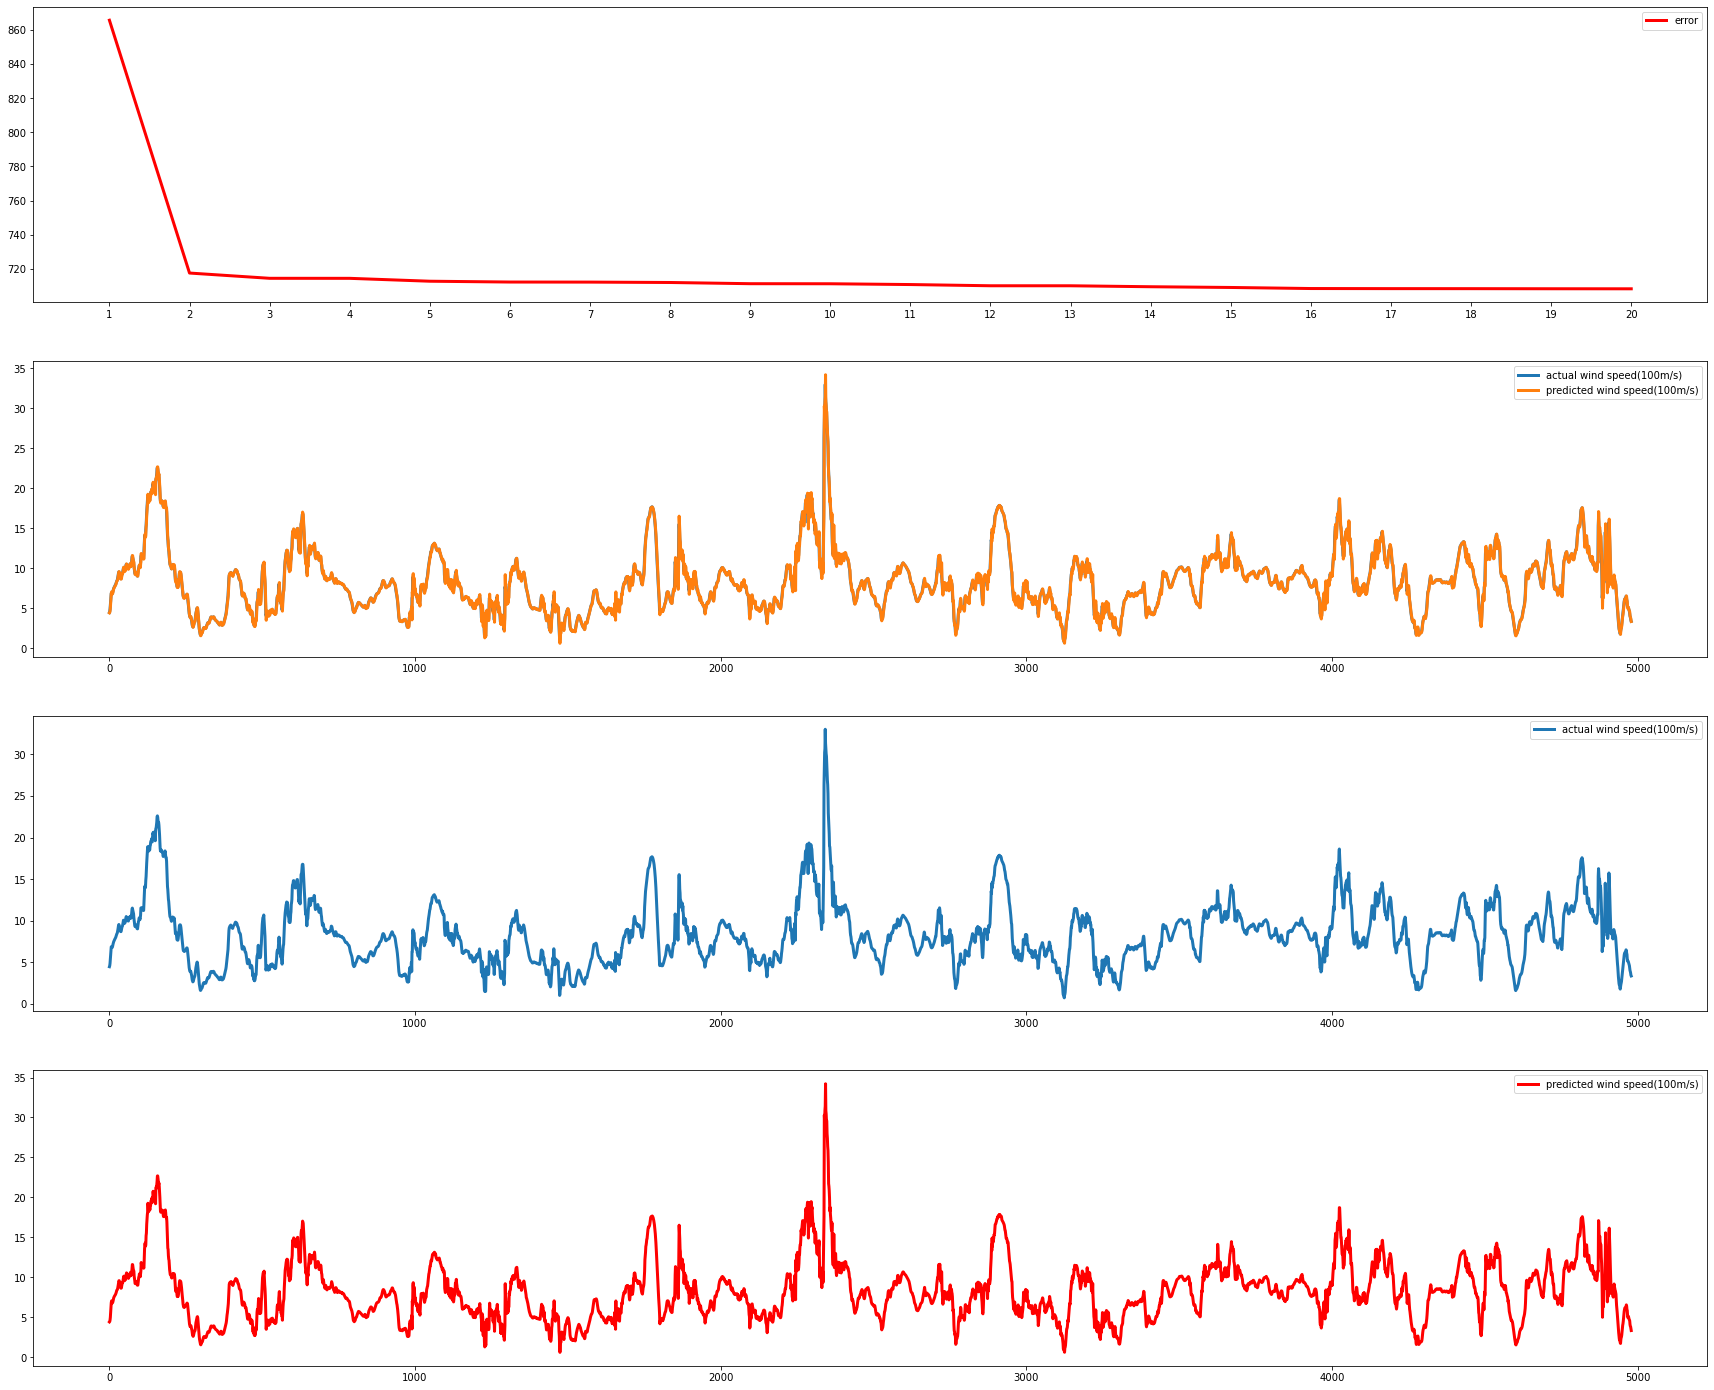

In [7]:
yreal = np.zeros((5000-num,1))
# yAR = np.zeros((4978,1))
# ypast = np.zeros((num,1))
for i in range(0,5000-num):
    yreal[i] = winddata[i+num]
t=range(0,5000-num)
# for i in range(0,4978):
#     for k in range(i,i+17):
#         ypast = winddata[i:i+20:1]
#     yAR[i][0]=ypast.T.dot(alpha);    
import matplotlib.pyplot as plt
# print(yAR)
plt.figure(figsize=(30,25))
plt.subplot(411)
n=range(1,21)
plt.plot(n,error,'r',linewidth=3)  #error versus n, where we can find out that n=20 is the best one
plt.xticks(n)
plt.legend(["error"])
plt.subplot(412)
plt.plot(t,yreal,linewidth=3)
plt.plot(t,yAR,linewidth=3)
plt.legend(["actual wind speed(100m/s)","predicted wind speed(100m/s)"])
plt.subplot(413)
plt.plot(t,yreal,linewidth=3)
plt.legend(["actual wind speed(100m/s)"])
plt.subplot(414)
plt.plot(t,yAR,'r',linewidth=3)
plt.legend(["predicted wind speed(100m/s)"])